# This notebook is for July 2019 stationary Cleaning & EDA

### Import needed modules

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Read in pkl file for analysis

In [3]:
july_df = pd.read_pickle('../data/june.pkl')
july_df.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
0,2019-06-01 00:00:12,36.1202,-86.7534,Powered93627c35-0f62-5b81-a78d-75a4a92ecf47,90.0,Jump
1,2019-06-01 00:00:12,36.1630,-86.7765,Powered17715097-e8a0-5494-a5ab-9b625796607d,63.0,Jump
2,2019-06-01 00:00:12,36.1202,-86.7533,Powerede5cb95ae-b091-5a93-86fa-ededd946d0d7,77.0,Jump
3,2019-06-01 00:00:12,36.1201,-86.7530,Powered71fa5e4f-1e17-54c4-936d-330df38cc2fa,0.0,Jump
4,2019-06-01 00:00:12,36.1622,-86.7806,Poweredfa549dd6-40bb-5757-ac87-2c2528f2bc68,2.0,Jump


In [4]:
july_df.tail()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname
28046090,2019-06-30 23:59:55.273000,36.125567,-86.776982,PoweredZYNSVOII2QSLD,100.0,Lime
28046091,2019-06-30 23:59:55.273000,36.121717,-86.775207,PoweredXOPAIWGL7SF62,93.0,Lime
28046092,2019-06-30 23:59:55.273000,36.127046,-86.777262,PoweredBYKFOWELGPKH6,61.0,Lime
28046093,2019-06-30 23:59:55.273000,36.123775,-86.790115,PoweredIAAQ7WODYXON7,35.0,Lime
28046094,2019-06-30 23:59:55.273000,36.121735,-86.775148,Powered3HJPPUNVYGL45,96.0,Lime


### Check column attributes

In [5]:
july_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28037408 entries, 0 to 28046094
Data columns (total 6 columns):
 #   Column       Dtype  
---  ------       -----  
 0   pubdatetime  object 
 1   latitude     float64
 2   longitude    float64
 3   sumdid       object 
 4   chargelevel  float64
 5   companyname  object 
dtypes: float64(3), object(3)
memory usage: 1.5+ GB


### Convert pubdatetime column from string to datetime format and create weekday column

In [6]:
july_df['pubdatetime'] = pd.to_datetime(july_df['pubdatetime'])
july_df['weekday'] = july_df['pubdatetime'].dt.weekday

#### Check for null within the columns

In [7]:
july_df.isnull().sum()

pubdatetime      0
latitude         0
longitude        0
sumdid           0
chargelevel    285
companyname      0
weekday          0
dtype: int64

### Drop nulls from chargelevel column

In [8]:
july_df.dropna(subset=['chargelevel'], inplace=True)
july_df.isnull().sum()

pubdatetime    0
latitude       0
longitude      0
sumdid         0
chargelevel    0
companyname    0
weekday        0
dtype: int64

### Count of scooters per company

In [9]:
july_co_cnt = july_df.groupby(['companyname'])['sumdid'].nunique().sort_values()
july_co_cnt

companyname
Gotcha     223
Bolt       333
Spin       713
Jump      1036
Lyft      1152
Lime      1455
Bird      2910
Name: sumdid, dtype: int64

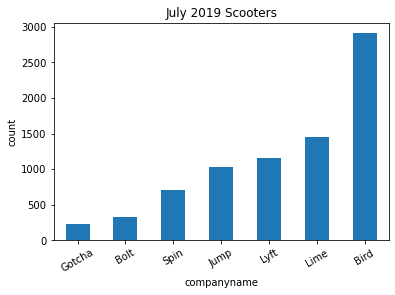

In [10]:
july_co_bar = july_co_cnt.plot.bar('companyname', 'sumdid', rot=30, title='July 2019 Scooters').set_ylabel('count')

### Check for dups within sumdid

In [11]:
july_df.sumdid.nunique()

7822

In [12]:
july_df.describe(include='O')

,sumdid,companyname
count,28037123,28037123
unique,7822,7
top,PoweredUNORTWSTRM4AM,Jump
freq,8631,8482893


### Round latitude and longitude

In [13]:
july_df = july_df.round({'latitude': 3})
july_df = july_df.round({'longitude': 3})

### Sort dataframes by sumdid and pubdatetime

In [14]:
july_df.sort_values(by=['sumdid','pubdatetime'], inplace=True)
july_df.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,weekday
1755,2019-06-01 00:01:58,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5
5235,2019-06-01 00:06:58,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5
8558,2019-06-01 00:11:59,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5
12076,2019-06-01 00:16:59,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5
15486,2019-06-01 00:21:59,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5


### Find when scooter is taken on a trip

In [15]:
july_df['prv_latitude'] = july_df.groupby(['sumdid'])['latitude'].shift(1)
july_df['prv_longitude'] = july_df.groupby(['sumdid'])['longitude'].shift(1)
july_df['nxt_latitude'] = july_df.groupby(['sumdid'])['latitude'].shift(-1)
july_df['nxt_longitude'] = july_df.groupby(['sumdid'])['longitude'].shift(-1)
july_df['dff_prv_latitude'] = july_df['prv_latitude'] - july_df['latitude']
july_df['dff_prv_longitude'] = july_df['prv_longitude'] - july_df['longitude']
july_df['dff_nxt_latitude'] = july_df['latitude'] - july_df['nxt_latitude']
july_df['dff_nxt_longitude'] = july_df['longitude'] - july_df['nxt_longitude']
july_df.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,weekday,prv_latitude,prv_longitude,nxt_latitude,nxt_longitude,dff_prv_latitude,dff_prv_longitude,dff_nxt_latitude,dff_nxt_longitude
1755,2019-06-01 00:01:58,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5,NaN,NaN,36.153,-86.769,NaN,NaN,0.0,0.0
5235,2019-06-01 00:06:58,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0
8558,2019-06-01 00:11:59,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0
12076,2019-06-01 00:16:59,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0
15486,2019-06-01 00:21:59,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0


### Calculate how long scooter is unused

In [16]:
july_df['shft_time'] = july_df.groupby(['sumdid'])['pubdatetime'].shift(-1)
july_df['shft_elaspe_time'] = july_df['shft_time'] - july_df['pubdatetime']
july_df['dff_time'] = july_df.groupby(['latitude', 'longitude'])['pubdatetime'].diff().fillna(pd.Timedelta(0))
july_df.head()

,pubdatetime,latitude,longitude,sumdid,chargelevel,companyname,weekday,prv_latitude,prv_longitude,nxt_latitude,nxt_longitude,dff_prv_latitude,dff_prv_longitude,dff_nxt_latitude,dff_nxt_longitude,shft_time,shft_elaspe_time,dff_time
1755,2019-06-01 00:01:58,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5,NaN,NaN,36.153,-86.769,NaN,NaN,0.0,0.0,2019-06-01 00:06:58,0 days 00:05:00,0 days 00:00:00
5235,2019-06-01 00:06:58,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0,2019-06-01 00:11:59,0 days 00:05:01,0 days 00:05:00
8558,2019-06-01 00:11:59,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0,2019-06-01 00:16:59,0 days 00:05:00,0 days 00:05:01
12076,2019-06-01 00:16:59,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0,2019-06-01 00:21:59,0 days 00:05:00,0 days 00:05:00
15486,2019-06-01 00:21:59,36.153,-86.769,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt,5,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0,2019-06-01 00:26:59,0 days 00:05:00,0 days 00:05:00


### Reorganize columns

In [17]:
july_df = july_df[['pubdatetime', 'dff_time', 'shft_time', 'shft_elaspe_time', 'weekday', 'latitude', 'longitude', 'prv_latitude', 'prv_longitude', 'nxt_latitude', 'nxt_longitude', 'dff_prv_latitude', 'dff_prv_longitude', 'dff_nxt_latitude', 'dff_nxt_longitude', 'sumdid', 'chargelevel', 'companyname']]
july_df.head()

,pubdatetime,dff_time,shft_time,shft_elaspe_time,weekday,latitude,longitude,prv_latitude,prv_longitude,nxt_latitude,nxt_longitude,dff_prv_latitude,dff_prv_longitude,dff_nxt_latitude,dff_nxt_longitude,sumdid,chargelevel,companyname
1755,2019-06-01 00:01:58,0 days 00:00:00,2019-06-01 00:06:58,0 days 00:05:00,5,36.153,-86.769,NaN,NaN,36.153,-86.769,NaN,NaN,0.0,0.0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt
5235,2019-06-01 00:06:58,0 days 00:05:00,2019-06-01 00:11:59,0 days 00:05:01,5,36.153,-86.769,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt
8558,2019-06-01 00:11:59,0 days 00:05:01,2019-06-01 00:16:59,0 days 00:05:00,5,36.153,-86.769,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt
12076,2019-06-01 00:16:59,0 days 00:05:00,2019-06-01 00:21:59,0 days 00:05:00,5,36.153,-86.769,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt
15486,2019-06-01 00:21:59,0 days 00:05:00,2019-06-01 00:26:59,0 days 00:05:00,5,36.153,-86.769,36.153,-86.769,36.153,-86.769,0.0,0.0,0.0,0.0,Powered-017d3133-f14a-2b83-ee4f-d777e7c5b619,57.2,Bolt


### Export cleaned file to pkl

In [19]:
july_df.to_pickle('../data/july_cleaned.pkl')